In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

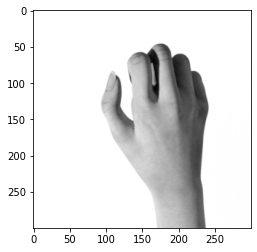

In [2]:
# This cell is used to show an image from the dataset. 

# DATADIR = r"C:\Users\markn\OneDrive\Desktop\Spring 2021\CS 4662 - Advanced Machine Learning\RPS"
DATADIR = r'./rps'
# subfolders in RPS folder
CATEGORIES = ["rock", "paper", "scissors"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # paths to RPS dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        # changing to grayscale so its faster processing.
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [3]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 254]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 253 254]
 [255 255 255 ... 254 254 254]]


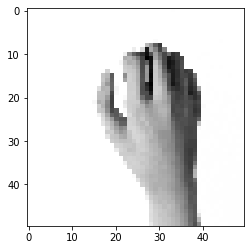

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [5]:
# creating the training set, getting the dimensions of the image, 
# and giving it a label based on it being rock, paper, or scissors.

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # paths to RPS dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [6]:
print(len(training_data))

2520


In [7]:
import random

# shuffles the training set.
random.shuffle(training_data)

In [8]:
# shows that the training set is shuffled
for sample in training_data[:10]:
    print(sample[1])

2
0
0
2
1
0
2
0
1
1


In [9]:
X = []
y = []

In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)

# import note: the 1 at the end represents grayscale. if using color,
# make sure to use 3 instead of 1. 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [11]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
data = y #REPLACE THIS LINE WITH YOUR ARRAY


data = array(data)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
# invert encoding
inverted = argmax(encoded[0])
print(inverted)

[2 0 0 ... 1 1 2]
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
2


In [12]:
X[1]

array([[[253],
        [253],
        [254],
        ...,
        [243],
        [240],
        [239]],

       [[254],
        [253],
        [254],
        ...,
        [241],
        [239],
        [239]],

       [[253],
        [253],
        [253],
        ...,
        [240],
        [240],
        [240]],

       ...,

       [[252],
        [252],
        [251],
        ...,
        [248],
        [248],
        [249]],

       [[252],
        [252],
        [252],
        ...,
        [249],
        [249],
        [250]],

       [[252],
        [251],
        [251],
        ...,
        [249],
        [249],
        [249]]], dtype=uint8)

In [13]:
print(X.shape)

(2520, 50, 50, 1)


In [14]:
print(encoded.shape)

(2520, 3)


In [15]:
model = Sequential ([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(X.shape[1:])),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 27651     
Total params: 46,467
Trainable params: 46,467
Non-trainable params: 0
____________________________________________________

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(X, encoded, batch_size=32, epochs=10)

Epoch 1/10
79/79 [==============================] - 3s 32ms/step - loss: 25.7337 - accuracy: 0.5477
Epoch 2/10
79/79 [==============================] - 3s 33ms/step - loss: 0.0325 - accuracy: 0.9921
Epoch 3/10
79/79 [==============================] - 3s 35ms/step - loss: 0.0068 - accuracy: 0.9995
Epoch 4/10
79/79 [==============================] - 3s 33ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 5/10
79/79 [==============================] - 2s 31ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 6/10
79/79 [==============================] - 2s 31ms/step - loss: 8.1184e-04 - accuracy: 1.0000
Epoch 7/10
79/79 [==============================] - 2s 31ms/step - loss: 7.4449e-04 - accuracy: 1.0000
Epoch 8/10
79/79 [==============================] - 2s 32ms/step - loss: 5.1681e-04 - accuracy: 1.0000
Epoch 9/10
79/79 [==============================] - 2s 31ms/step - loss: 4.3524e-04 - accuracy: 1.0000
Epoch 10/10
79/79 [==============================] - 2s 31ms/step - loss: 3.3820e-04 - accur

In [19]:
model.evaluate(X, encoded)

79/79 [==============================] - 1s 7ms/step - loss: 2.7882e-04 - accuracy: 1.0000


[0.00027881539426743984, 1.0]

In [23]:
import cv2 
import imutils
from PIL import Image, ImageOps

camera = cv2.VideoCapture(0)

top, right, bottom, left = 10, 350, 255, 590

thickness = 2

img_counter = 0

while(camera.isOpened()):
    
    (grabbed, frame) = camera.read()
    
    frame = imutils.resize(frame, width=700)
    
    frame = cv2.flip(frame, 1)
    
    clone = frame.copy()
    
#     (height, width) = frame.shape[:2]
    
#     roi = frame[top:bottom, right:left]
    
    image_area = cv2.rectangle(clone, (left, top), (right, bottom), (0, 255, 0), thickness)
    
    cv2.imshow("Video Feed", clone)
    
    
    keypress = cv2.waitKey(1)
    
    if keypress%256 == 32:
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, image_area)
        print("{} written!".format(img_name))
        
        taken_img = Image.open(img_name)

        width, height = taken_img.size


        cropped_image = taken_img.crop((right+thickness,top+thickness,left-thickness,bottom-thickness))


        cropped_image = cropped_image.resize((50,50))

        cropped_image = ImageOps.grayscale(cropped_image)
        test_image = np.array(cropped_image)

        test_image = test_image.reshape(-1,50,50,1)

        predictions = model.predict(test_image, verbose=1)

        for i in range(len(predictions[0])):
            if i == 0:
                print("Probability of rock: ", predictions[0][i])
            elif i == 1:
                print("Probability of paper: ", predictions[0][i])
            else:
                print("Probability of scissor: ", predictions[0][i])
        img_counter+=1
    elif keypress & 0xFF == ord('q'):
        break
        
        
camera.release()
cv2.destroyAllWindows()

opencv_frame_0.png written!
1/1 [==============================] - 0s 12ms/step
Probability of rock:  1.6628588e-06
Probability of paper:  2.165724e-08
Probability of scissor:  0.99999833
opencv_frame_1.png written!
1/1 [==============================] - 0s 12ms/step
Probability of rock:  0.14632845
Probability of paper:  0.00035422825
Probability of scissor:  0.8533174


In [21]:
taken_img = Image.open(img_name)

width, height = taken_img.size


cropped_image = taken_img.crop((right+thickness,top+thickness,left-thickness,bottom-thickness))


cropped_image = cropped_image.resize((50,50))

cropped_image = ImageOps.grayscale(cropped_image)
test_image = np.array(cropped_image)

test_image = test_image.reshape(-1,50,50,1)

predictions = model.predict(test_image, verbose=1)

for i in range(len(predictions[0])):
    if i == 0:
        print("Probability of rock: ", predictions[0][i])
    elif i == 1:
        print("Probability of paper: ", predictions[0][i])
    else:
        print("Probability of scissor: ", predictions[0][i])

1/1 [==============================] - 0s 15ms/step
Probability of rock:  0.01066283
Probability of paper:  0.00019175868
Probability of scissor:  0.9891454
